In [ ]:
## importacion de librerias utiles

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

Desafío analítico de Deel (Ops)
Contexto empresarial
Los clientes de Deel pueden agregar fondos a su cuenta de Deel utilizando su crédito y débito
tarjetas Deel se ha asociado con Globepay para procesar todos estos fondos de cuenta
transacciones con tarjetas de crédito y débito. Globepay es un pago global líder en la industria
procesador y es capaz de procesar pagos en muchas monedas desde tarjetas
domiciliada en muchos países.
Deel tiene conectividad con Globepay usando su API. Los clientes de Deel brindan sus
detalles de crédito y débito dentro de la aplicación web Deel, los sistemas Deel pasan esos
credenciales junto con cualquier detalle relevante de la transacción a Globepay para su procesamiento.
Problema
Deel está experimentando una disminución en la tasa de aceptación de tarjetas de crédito y débito
pagos procesados ​​por Globepay en el período reciente. La "tasa de aceptación" es
definido como el número de transacciones aceptadas dividido por el total intentado
actas.
Archivos Relevantes:
● Informe de aceptación
● Informe de reembolso
● globopay_api.html
El candidato es libre de usar Excel o cualquier lenguaje de secuencias de comandos para analizar y analizar
Los datos. Muestre todo su trabajo (incluido su código, si corresponde) y
suposiciones, así como proporcionar un pdf/keynote con sus hallazgos (resultados)

https://drive.google.com/file/d/1S21IuRncZcP3trwU8aT-XfpYdncuWR1n/view

In [ ]:
## creacion de la carpeta contenedora montada en drive

from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/'

/content/drive/MyDrive


In [ ]:
##cargamos el dataframe
df_pay = pd.read_csv('Globepay Acceptance Report - Globepay Acceptance Report.csv')

df_pay.head()

,external_ref,status,source,ref,date_time,state,cvv_provided,amount,country,currency,rates
0,nCyEIIGaP5QQ2Wqb-_Rt8,True,GLOBALPAY,evt_1ESgcCOV7fY1ChY1MkZizZt,2019-01-01T00:00:00.000Z,DECLINED,False,1020.46,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
1,ptNiI9B7NNpK7VsMZx6zZ,True,GLOBALPAY,evt_1EBMGCEjEtianKMJaZXOx1y,2019-01-01T04:48:00.000Z,ACCEPTED,False,1582.57,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
2,1GS5BDKBnauCt-3nHPs6x,True,GLOBALPAY,evt_1EOALu0AZqEhZBn9ub_nbcE,2019-01-01T09:36:00.000Z,DECLINED,False,1653.07,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
3,Y_oecYz8GjBDaxmMqkkLQ,True,GLOBALPAY,evt_1ESHsWyaSPqE1mrmJ2B6rvs,2019-01-01T14:24:00.000Z,ACCEPTED,False,2228.17,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
4,LlEs1TnKVa2xX6PH9Zsz0,True,GLOBALPAY,evt_1EjzPk13qLzmvDR_4hXuMMw,2019-01-01T19:12:00.000Z,ACCEPTED,False,2589.92,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."


In [ ]:
##vemos como esta conformado

df_pay.describe()

,amount
count,5430.000000
mean,86938.605757
std,50327.853421
min,-23.780000
25%,42481.355000
50%,85488.025000
75%,128548.397500
max,180371.520000


In [ ]:
##eliminamos la columna 'external_ref'

df_pay = df_pay.drop('external_ref', axis='columns')
df_pay = df_pay.drop('ref', axis='columns')



In [ ]:
## consultamos la tabla principal para ver las modificaciones

df_pay.head()

,status,source,date_time,state,cvv_provided,amount,country,currency,rates
0,True,GLOBALPAY,2019-01-01T00:00:00.000Z,DECLINED,False,1020.46,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
1,True,GLOBALPAY,2019-01-01T04:48:00.000Z,ACCEPTED,False,1582.57,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
2,True,GLOBALPAY,2019-01-01T09:36:00.000Z,DECLINED,False,1653.07,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
3,True,GLOBALPAY,2019-01-01T14:24:00.000Z,ACCEPTED,False,2228.17,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
4,True,GLOBALPAY,2019-01-01T19:12:00.000Z,ACCEPTED,False,2589.92,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."


In [ ]:
## vemos la descripcion de cada tipo de dato

df_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status        5430 non-null   bool   
 1   source        5430 non-null   object 
 2   date_time     5430 non-null   object 
 3   state         5430 non-null   object 
 4   cvv_provided  5430 non-null   bool   
 5   amount        5430 non-null   float64
 6   country       5430 non-null   object 
 7   currency      5430 non-null   object 
 8   rates         5430 non-null   object 
dtypes: bool(2), float64(1), object(6)
memory usage: 307.7+ KB


In [ ]:
## enlistamos la columna state

state = list(df_pay.state)
state

['DECLINED',
 'ACCEPTED',
 'DECLINED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'DECLINED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'DECLINED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'DECLINED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'DECLINED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'DECLINED',
 'DECLINED',
 'ACCEPTED',
 'ACCEPTED',
 'DECLINED',
 'ACCEPTED',
 'ACCEPTED',
 'DECLINED',
 'ACCEPTED',
 'DECLINED',
 'DECLINED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',
 'DECLINED',
 'DECLINED',
 'ACCEPTED',
 'DECLINED',
 'ACCEPTED',
 'ACCEPTED',
 'DECLINED',
 'DECLINED',
 'ACCEPTED',
 'DECLINED',
 'DECLINED',
 'ACCEPTED',
 'ACCEPTED',
 'ACCEPTED',

In [ ]:
state = pd.Series(df_pay['state'])
state

0       DECLINED
1       ACCEPTED
2       DECLINED
3       ACCEPTED
4       ACCEPTED
          ...   
5425    ACCEPTED
5426    DECLINED
5427    ACCEPTED
5428    ACCEPTED
5429    DECLINED
Name: state, Length: 5430, dtype: object

In [ ]:
df_pay.columns

Index(['status', 'source', 'date_time', 'state', 'cvv_provided', 'amount',
       'country', 'currency', 'rates'],
      dtype='object')

In [ ]:
columnas = ['status', 'source', 'date_time', 'state', 'cvv_provided']

In [ ]:
columnas



['status', 'source', 'date_time', 'state', 'cvv_provided']

In [ ]:
## transformando el head, utilizamos un nuevo dataframe con la informacion util

df_pay2 = df_pay[columnas]
print(df_pay2)
print(df_pay2.columns)

      status     source                 date_time     state  cvv_provided
0       True  GLOBALPAY  2019-01-01T00:00:00.000Z  DECLINED         False
1       True  GLOBALPAY  2019-01-01T04:48:00.000Z  ACCEPTED         False
2       True  GLOBALPAY  2019-01-01T09:36:00.000Z  DECLINED         False
3       True  GLOBALPAY  2019-01-01T14:24:00.000Z  ACCEPTED         False
4       True  GLOBALPAY  2019-01-01T19:12:00.000Z  ACCEPTED         False
...      ...        ...                       ...       ...           ...
5425    True  GLOBALPAY  2019-06-30T00:00:00.000Z  ACCEPTED         False
5426    True  GLOBALPAY  2019-06-30T04:48:00.000Z  DECLINED         False
5427    True  GLOBALPAY  2019-06-30T09:36:00.000Z  ACCEPTED         False
5428    True  GLOBALPAY  2019-06-30T14:24:00.000Z  ACCEPTED         False
5429    True  GLOBALPAY  2019-06-30T19:12:00.000Z  DECLINED         False

[5430 rows x 5 columns]
Index(['status', 'source', 'date_time', 'state', 'cvv_provided'], dtype='object')


In [ ]:
df_pay2.head()


,status,source,date_time,state,cvv_provided,states
0,True,GLOBALPAY,2019-01-01 00:00:00+00:00,DECLINED,False,[DECLINED]
1,True,GLOBALPAY,2019-01-01 04:48:00+00:00,ACCEPTED,False,[ACCEPTED]
2,True,GLOBALPAY,2019-01-01 09:36:00+00:00,DECLINED,False,[DECLINED]
3,True,GLOBALPAY,2019-01-01 14:24:00+00:00,ACCEPTED,False,[ACCEPTED]
4,True,GLOBALPAY,2019-01-01 19:12:00+00:00,ACCEPTED,False,[ACCEPTED]


In [ ]:
df_pay2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   status        5430 non-null   bool               
 1   source        5430 non-null   object             
 2   date_time     5430 non-null   datetime64[ns, UTC]
 3   state         5430 non-null   object             
 4   cvv_provided  5430 non-null   bool               
 5   states        5430 non-null   object             
dtypes: bool(2), datetime64[ns, UTC](1), object(3)
memory usage: 180.4+ KB


In [ ]:
## visualizamos un dataframe con los estados de las transacciones

group_state = df_pay2.groupby('state')[['status','date_time']]
group_state.describe()

status                    date_time                                   \
          count unique   top  freq     count unique                       top   
state                                                                           
ACCEPTED   3777      1  True  3777      3777    905  2019-01-01T04:48:00.000Z   
DECLINED   1653      1  True  1653      1653    801  2019-04-06T00:00:00.000Z   

               
         freq  
state          
ACCEPTED    6  
DECLINED    5

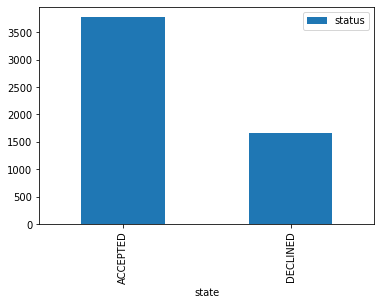

In [ ]:
group = df_pay2.groupby('state')[['status','source','date_time']].sum().plot(kind='bar',legend='Reverse')
    



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


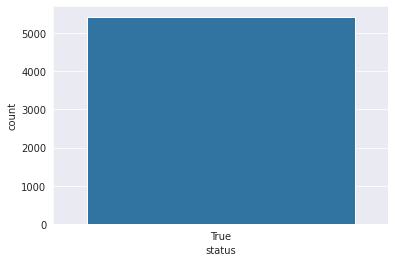

In [ ]:
##tomamos variables para las graficas

accepted=df_pay2[df_pay2.state=='ACCEPTED'].sum()
declined=df_pay2[df_pay2.state=='DECLINED'].sum()



sns.countplot(df_pay2['status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


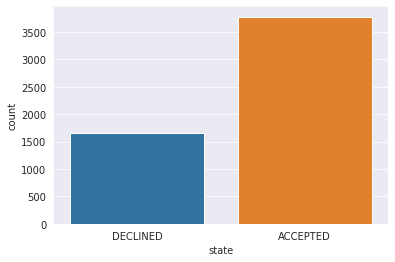

In [ ]:
sns.countplot(df_pay2['state'])

Text(0.5, 1.0, 'plot')

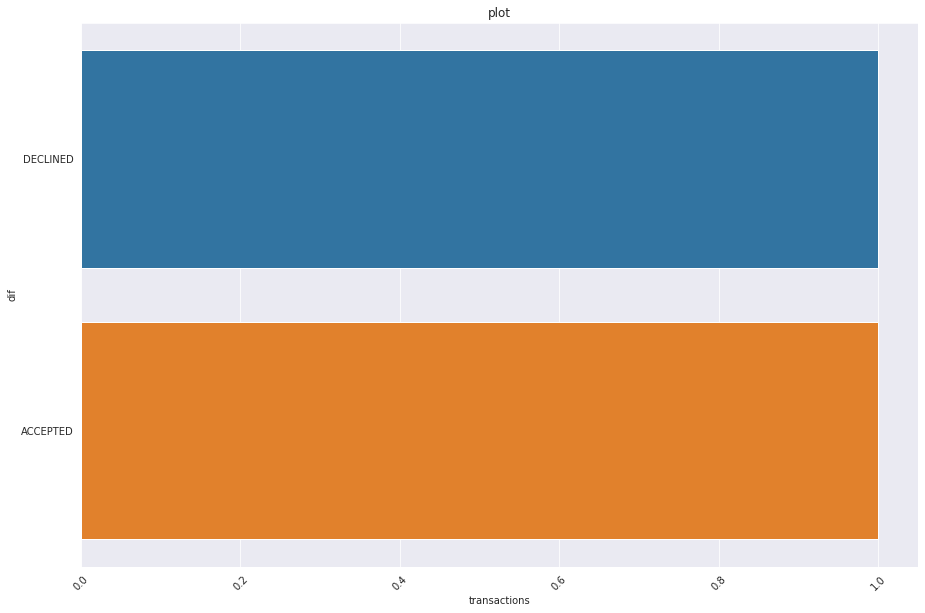

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=df_pay2['status'], y=df_pay2['state'])
plt.xticks(rotation= 45)
plt.xlabel('transactions')
plt.ylabel('dif')
plt.title('plot')

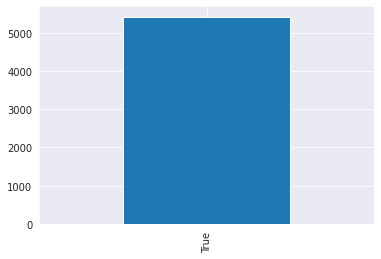

In [ ]:
df_pay2['status'].value_counts().head(10).plot.bar()

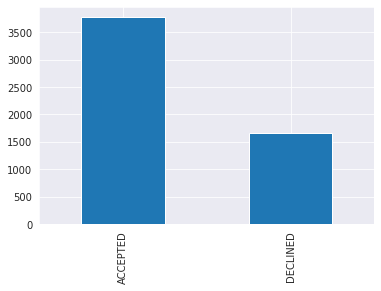

In [ ]:
df_pay2['state'].value_counts().head(10).plot.bar()

In [ ]:
##verificamos que no contenga valores nulos para los siguientes calculos

print(df_pay2.isnull().sum())

status          0
source          0
date_time       0
state           0
cvv_provided    0
dtype: int64


In [ ]:
##creamos uan variable donde sumamos todas las transacciones

data_sum= df_pay2['status'].sum()
print("Total de transacciones:")
print(data_sum)



Total de transacciones:
5430


In [ ]:
##creamos una nueva variable donde sacamos la tasa de efectividad
## tasa de efectividad = transacciones aceptadas / total de transacciones
## necesitamos ese porcentaje entonces a la variable la multiplicamos *100
print("total de transacciones aceptadas:")
print(accepted['status'])

new = accepted['status'].sum() / data_sum
new
print("tasa de efectividad:")
print (new)

total de transacciones aceptadas:
3777
tasa de efectividad:
0.6955801104972376


In [ ]:
print("La tasa de efectividad porcentual de las transacciones " )
print(new*100, "%")


La tasa de efectividad porcentual de las transacciones 
69.55801104972376 %
